In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from core.data import load_from_kaggle

#pd.set_option('display.width', None)
#pd.set_option('display.max_columns', None)

In [2]:
dataset_link = "yunusemretokdemir/customer-segmentation" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\customer-segmentation' already exists with files. Skipping download (replace=False).


In [3]:
files

['PBL5recommendationdata.csv', 'PBL5recommendationdata_cut.csv']

In [4]:
# ---  load data
#df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), encoding="latin1")

#for col in df.columns:
#    print(col)


In [67]:
### ---  Selecting the most relevant columns for further analysis --- 
# ---  % null
null_value = (df.isna().mean() * 100).sort_values(ascending=True)
null_value.tail(10)

Products.sale_price              72.341440
Orders.coupon_id                 78.969957
Orders.coupon_amount             78.969957
Orders.company                   82.594182
Orders.payment_method            82.784931
Orders.discount_amount           91.320935
Orders.balance_due               91.630901
Orders.discount_name             93.276109
Orders.reorder_id                98.044826
Order_Items.reorder_frequency    99.427754
dtype: float64

In [600]:
### --- Selecting the most relevant columns for further analysis --- 

# ---  list of columns with less than 99% null values 
ohne_null_cols = null_value[null_value < 90].index.tolist()
print(len(ohne_null_cols))
print(ohne_null_cols)

# df = pd.read_csv("/".join(["../data/raw/", dataset_name, "PBL5recommendationdata.csv"]), usecols=ohne_null_cols, encoding="latin1")



51
['Customers.id', 'Customers.fname', 'Customers.lname', 'Customers.company', 'Customers.create_date', 'Customers.mailing', 'Customers.last_modified', 'Orders.id', 'Orders.customer_id', 'Orders.company', 'Orders.order_number', 'Orders.subtotal', 'Orders.tax', 'Orders.shipping', 'Orders.coupon_id', 'Orders.coupon_amount', 'Orders.discount_name', 'Orders.total', 'Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.payment_status', 'Orders.payment_date', 'Orders.payment_method', 'Orders.payment_amount', 'Orders.status', 'Orders.placed_date', 'Orders.updated_date', 'Orders.shipped_date', 'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 'Order_Items.product_name', 'Order_Items.qty', 'Order_Items.price', 'Order_Items.cost', 'Products.id', 'Products.status', 'Products.vendor', 'Products.import_id', 'Products.name', 'Products.list_price', 'Products.price', 'Products.sale_price', 'Products.cost', 'Products.last_modified', 'Products.taxable', 'Products.shopping_brand', 

In [591]:
df.head(10)
high_null_cols = null_value[null_value > 90].index.tolist()

len(high_null_cols)

high_null_cols

# ---  drop high null columns
#df = df.drop(columns=high_null_cols)

['Orders.reorder_id',
 'Orders.discount_amount',
 'Orders.balance_due',
 'Order_Items.reorder_frequency']

In [6]:
### ---  Selecting the most relevant columns for further analysis --->

cols_use = [
    "Customers.id", "Customers.fname", "Customers.lname", "Customers.company",
    "Customers.create_date", "Customers.mailing", "Customers.last_modified",
    "Orders.id", "Orders.customer_id", "Orders.fname", "Orders.lname",
    "Orders.company", "Orders.order_number", "Orders.reorder_id",
    "Orders.external_source", "Orders.external_id", "Orders.subtotal",
    "Orders.tax", "Orders.shipping", "Orders.coupon_id", "Orders.coupon_amount",
    "Orders.discount_name",
    "Orders.discount_amount", "Orders.total", "Orders.balance_due",
    "Orders.shipping_carrier", "Orders.shipping_method", "Orders.payment_status",
    "Orders.payment_date", "Orders.payment_user", "Orders.payment_type",
    "Orders.payment_method", "Orders.payment_amount", "Orders.payment_id",
    "Orders.payment_code", "Orders.status", "Orders.placed_date",
    "Orders.updated_date", "Orders.shipped_date", "Orders.comments",
    "Order_Items.id", "Order_Items.parent", "Order_Items.product_id",
    "Order_Items.product_name", "Order_Items.qty", "Order_Items.price",
    "Order_Items.cost", "Order_Items.reorder_frequency",
    "Products.id", "Products.status", "Products.vendor", "Products.import_id",
    "Products.name", "Products.display_name", "Products.list_price",
    "Products.price", "Products.sale_price", "Products.cost",
    "Products.last_modified", "Products.taxable", "Products.shopping_brand",
    "Products.shopping_color",
    "Products.quickbooks_id",
    "Products.qb_edit_sequence", "Products.short_description", "Products.unit",
    "Products.packaging", "Products.display_packaging", "Products.multiple",
    "Products.latex", "Products.case_qty", "Products.notes",
    "Products.map_price", "Products.family_id"
]

df = pd.read_csv("/".join(["../data/raw/", dataset_name, "PBL5recommendationdata.csv"]), usecols=cols_use, encoding="latin1")


C:\Users\Anna\AppData\Local\Temp\ipykernel_8420\632429006.py:32: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/".join(["../data/raw/", dataset_name, "PBL5recommendationdata.csv"]), usecols=cols_use, encoding="latin1")


In [136]:
#df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), encoding="latin1")
#df = pd.read_csv("/".join(["../data/raw", dataset_name, "PBL5recommendationdata_cut.csv"]), sep=';')

df.head(8)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.customer_id,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Products.id,Products.status,Products.vendor,Products.import_id,Products.name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_color,Products.unit,Products.case_qty,Products.family_id
0,797,Christy,Dill,Company0,2015-03-10 20:18:44,0.0,2015-07-24 18:58:26,3758,797,Company0,3758,NaN,57.20,0.0,9.95,13.0,2.86,No Discount,NaN,64.29,NaN,fedex,Ground,3.0,2015-03-10 20:24:59,authorize.net,64.29,1,2015-03-10 20:24:59,2015-08-06 13:40:10,2015-03-11 19:08:42,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,NaN,2310.0,0.0,Vendor_A,3.0,"Basic Steel Rollators,Green",80.70,57.64,NaN,44.00,2016-05-13 18:05:23,1.0,MEDLINE,Green,EA,1.0,PF61071
1,3,John,Smith,Company1,2013-12-03 16:45:39,0.0,2015-07-24 18:59:14,23,3,Company1,23,NaN,20.00,0.0,9.99,NaN,NaN,No Discount,NaN,29.99,NaN,fedex,Ground,3.0,2013-12-03 17:07:35,authorize.net,29.99,1,2013-12-03 17:07:35,2015-08-25 18:49:43,2013-12-03 20:30:21,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,NaN,177.0,1.0,Vendor_A,3.0,Urinary Drain Bags,14.41,10.29,5.0,1.87,2016-05-04 13:52:35,1.0,MEDLINE,NaN,EA,1.0,PF02132
2,3,John,Smith,Company1,2013-12-03 16:45:39,0.0,2015-07-24 18:59:14,9531,3,Company1,9531,NaN,68.78,0.0,9.95,NaN,NaN,No Discount,NaN,78.73,NaN,manual,Standard Shipping,3.0,2015-12-08 19:40:52,authorize.net,78.73,3,2015-12-08 19:40:52,2015-12-15 21:04:47,NaT,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,NaN,1.0,0.0,Vendor_A,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,NaN,52.50,2016-05-13 18:05:23,1.0,MEDLINE,Blue,CS,800.0,PF00342
3,4,James,Anderson,Individual,2013-12-11 16:44:23,0.0,2015-07-24 18:30:46,29,4,NaN,29,NaN,19.56,0.0,9.95,NaN,NaN,No Discount,NaN,29.55,NaN,NaN,Ground,3.0,2013-12-11 16:44:23,Credit Card,29.55,1,2013-12-11 16:44:23,2015-08-25 18:49:43,2013-12-11 22:15:32,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,NaN,983.0,0.0,Vendor_A,3.0,Basket for 2-Button Walkers,27.38,19.56,NaN,12.62,2016-05-07 04:31:15,1.0,MEDLINE,NaN,EA,1.0,PF04970
4,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36,30,5,Company3,30,NaN,36.05,0.0,9.95,NaN,NaN,No Discount,NaN,46.00,NaN,fedex,Ground,3.0,2013-12-12 15:19:59,Credit Card,46.00,1,2013-12-12 15:19:59,2015-08-25 18:49:43,2013-12-12 19:13:43,40,30,991.0,Tens Units,1,36.05,25.75,NaN,991.0,1.0,Vendor_A,3.0,TENS 3000 Analog Unit,50.47,36.05,NaN,25.75,2016-05-04 13:52:35,1.0,ROSCOE MEDICAL INC,NaN,EA,1.0,PF03045
5,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36,226,5,Company3,226,NaN,44.46,0.0,9.95,NaN,NaN,No Discount,NaN,54.41,54.41,fedex,Ground,0.0,NaT,NaN,NaN,1,2014-03-09 15:55:27,2015-08-06 13:40:10,2014-03-10 20:10:09,341,226,310.0,"FitRight Ultra Protective Underwear, Large",1,44.46,32.22,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36,1658,5,Company3,1658,NaN,14.63,0.0,9.95,NaN,NaN,No Discount,NaN,24.58,24.58,fedex,Ground,3.0,2014-09-10 15:40:55,Credit Card,24.58,1,2014-09-10 15:40:55,2015-08-06 13:40:10,2014-09-10 20:51:39,2997,1658,799.0,"SensiCare Silk Nitrile Exam Gloves, Dark Blue,...",1,14.63,8.36,3.0,NaN,NaN,NaN,NaN,NaN

In [731]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customers.id,4194.0,1.796518e+03,1.065679e+03,3.000000e+00,8.652500e+02,1.747500e+03,2.698750e+03,3.736000e+03
Customers.create_date,4194.0,1.440971e+09,1.887681e+07,1.386089e+09,1.427323e+09,1.446412e+09,1.456955e+09,1.463418e+09
Customers.mailing,2114.0,9.796594e-01,1.411959e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Customers.last_modified,4194.0,1.450401e+09,1.021334e+07,1.437559e+09,1.437763e+09,1.456954e+09,1.456956e+09,1.463418e+09
Orders.id,4194.0,9.142984e+03,5.276541e+03,2.300000e+01,4.258000e+03,9.641000e+03,1.401175e+04,1.743700e+04
Orders.customer_id,4194.0,1.796518e+03,1.065679e+03,3.000000e+00,8.652500e+02,1.747500e+03,2.698750e+03,3.736000e+03
Orders.reorder_id,82.0,7.389159e+03,3.818085e+03,3.000000e+01,4.537250e+03,6.887000e+03,1.083200e+04,1.620100e+04
Orders.external_id,5.0,6.018061e+08,1.342831e+09,6.638000e+01,1.698485e+06,1.698485e+06,1.698485e+06,3.003935e+09
Orders.subtotal,4194.0,1.319252e+02,2.311569e+02,2.890000e+00,3.675000e+01,7.474000e+01,1.399600e+02,5.163040e+03
Orders.tax,3737.0,8.008376e-01,4.859280e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329300e+02


In [9]:
df['Customers.create_date'] = pd.to_datetime(df['Customers.create_date'], unit='s')
df['Customers.last_modified'] = pd.to_datetime(df['Customers.last_modified'], unit='s')
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date'], unit='s')
df['Orders.payment_date'] = pd.to_datetime(df['Orders.payment_date'], unit='s')
df['Orders.updated_date'] = pd.to_datetime(df['Orders.updated_date'], unit='s')
df['Orders.shipped_date'] = pd.to_datetime(df['Orders.shipped_date'], unit='s')
df['Products.last_modified'] = pd.to_datetime(df['Products.last_modified'], unit='s')
df['Products.qb_edit_sequence'] = pd.to_datetime(df['Products.qb_edit_sequence'], unit='s')

In [10]:
df['Customers.create_date'] = pd.to_datetime(df['Customers.create_date']).dt.floor('s')
df['Customers.last_modified'] = pd.to_datetime(df['Customers.last_modified']).dt.floor('s')
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date']).dt.round('s')
df['Orders.payment_date'] = pd.to_datetime(df['Orders.payment_date']).dt.round('s')
df['Orders.updated_date'] = pd.to_datetime(df['Orders.updated_date']).dt.round('s')
df['Orders.shipped_date'] = pd.to_datetime(df['Orders.shipped_date']).dt.round('s')
df['Products.last_modified'] = pd.to_datetime(df['Products.last_modified']).dt.round('s')
df['Products.qb_edit_sequence'] = pd.to_datetime(df['Products.qb_edit_sequence']).dt.round('s')


In [11]:
#standarte Zelle

display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(4194, 74)

'Description'

,count,mean,min,25%,50%,75%,max,std
Customers.id,4194.0,1796.52,3.0,865.25,1747.5,2698.75,3736.0,1065.68
Customers.create_date,4194,2015-08-30 21:50:33.705769984,2013-12-03 16:45:39,2015-03-25 22:34:54,2015-11-01 21:00:05,2016-03-02 21:43:58.249999872,2016-05-16 17:00:49,NaN
Customers.mailing,2114.0,0.98,0.0,1.0,1.0,1.0,1.0,0.14
Customers.last_modified,4194,2015-12-18 01:06:01.111110912,2015-07-22 09:59:40,2015-07-24 18:41:19.249999872,2016-03-02 21:20:24,2016-03-02 21:53:39.750000128,2016-05-16 17:00:49,NaN
Orders.id,4194.0,9142.98,23.0,4258.0,9641.0,14011.75,17437.0,5276.54
Orders.customer_id,4194.0,1796.52,3.0,865.25,1747.5,2698.75,3736.0,1065.68
Orders.reorder_id,82.0,7389.16,30.0,4537.25,6887.0,10832.0,16201.0,3818.09
Orders.external_id,5.0,601806117.48,66.38,1698485.0,1698485.0,1698485.0,3003935066.0,1342831106.3
Orders.subtotal,4194.0,131.93,2.89,36.75,74.74,139.96,5163.04,231.16
Orders.tax,3737.0,0.8,0.0,0.0,0.0,0.0,132.93,4.86


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Customers.id,int64,0,3054,"[55, 1619, 1498]"
Customers.fname,object,0,1631,"[Deborah, Robert, Santosh]"
Customers.lname,object,0,2557,"[Stockard, Lundberg, davenport3429 us]"
Customers.company,object,3467,425,"[nan, Company136, nan]"
Customers.create_date,datetime64[ns],0,3054,"[2016-03-29 22:17:04, 2015-05-28 21:36:44, 201..."
...,...,...,...,...
Products.latex,object,2255,9,"[Not Made With Natura, Yes, Yes]"
Products.case_qty,float64,1556,76,"[200.0, 300.0, nan]"
Products.notes,object,3748,39,"[nan, nan, nan]"
Products.map_price,float64,4072,38,"[nan, nan, nan]"


In [12]:
df_backup = df.copy() 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customers.id                   4194 non-null   int64         
 1   Customers.fname                4194 non-null   object        
 2   Customers.lname                4194 non-null   object        
 3   Customers.company              727 non-null    object        
 4   Customers.create_date          4194 non-null   datetime64[ns]
 5   Customers.mailing              2114 non-null   float64       
 6   Customers.last_modified        4194 non-null   datetime64[ns]
 7   Orders.id                      4194 non-null   int64         
 8   Orders.customer_id             4194 non-null   int64         
 9   Orders.fname                   4194 non-null   object        
 10  Orders.lname                   4194 non-null   object        
 11  Orders.company   

In [14]:
# --- text fields --- 

text_cols = df.select_dtypes(include='object').columns
text_cols

Index(['Customers.fname', 'Customers.lname', 'Customers.company',
       'Orders.fname', 'Orders.lname', 'Orders.company', 'Orders.order_number',
       'Orders.external_source', 'Orders.discount_name',
       'Orders.shipping_carrier', 'Orders.shipping_method',
       'Orders.payment_user', 'Orders.payment_type', 'Orders.payment_method',
       'Orders.payment_id', 'Orders.payment_code', 'Orders.comments',
       'Order_Items.product_name', 'Products.name', 'Products.display_name',
       'Products.shopping_brand', 'Products.shopping_color',
       'Products.quickbooks_id', 'Products.short_description', 'Products.unit',
       'Products.packaging', 'Products.display_packaging', 'Products.multiple',
       'Products.latex', 'Products.notes', 'Products.family_id'],
      dtype='object')

In [141]:
### ---  Column structuring --- 

id_list = ['Customers.id', 'Orders.id', 'Orders.customer_id', 'Orders.order_number', 'Orders.reorder_id',
           'Orders.coupon_id', 'Orders.reorder_id',
          'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 
          'Products.id',  'Products.import_id', 'Products.family_id'
        ]		


text_list = ['Customers.fname', 'Customers.lname',
            'Customers.company', 
            'Orders.company', 'Orders.discount_name',
            'Orders.shipping_method', 
            'Order_Items.product_name', 
            'Products.shopping_color'
            ]

integer_list = ['Customers.mailing', 'Order_Items.qty', 'Order_Items.reorder_frequency', 'Products.taxable', 
                'Orders.payment_status', 'Orders.status', 'Products.status'
                ]

category_list = ['Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.payment_method', 
                'Products.vendor', 'Products.shopping_brand'
                ]

blacklist = ['Orders.external_id', 'Orders.external_source', 'Orders.payment_user', 
            'Orders.payment_id', 'Orders.payment_code', 'Orders.comments',   
            'Products.quickbooks_id', 'Products.qb_edit_sequence','Products.display_packaging',
            'Products.short_description', 'Products.notes', 'Products.multiple',
            'Products.latex', 'Products.map_price'
            ] 

blacklist2 = ['Orders.lname','Orders.fname']   

blacklist3 = ['Orders.payment_type', 'Products.display_name', 'Products.packaging'
              ] 


In [22]:
for col in id_list:
    df[col] = df[col].astype("object")



# !!!!! only after handling missing values in the separate dataframes

#for col in category_list:
#    df[col] = df[col].astype("category")   

In [23]:
# --- delete columns with special characters
df = df.drop(columns=blacklist)
#df = df.drop(columns=blacklist2)
#df = df.drop(columns=blacklist3)

In [ ]:
#### ---               df_backup

#df_backup = df.copy() 
#df = df_backup.copy()

#df_backup2 = df.copy() # 
#df = df_backup2.copy()

#df_backup3 = df.copy() # customer, order, item, product
#df = df_backup3.copy()

In [20]:
# --- 

mismatch = df[
    (df['Orders.lname'] != df['Customers.lname']) |
    (df['Orders.fname'] != df['Customers.fname'])
]

mismatch = mismatch.reset_index(drop=True)

mismatch[[
    'Customers.id',
    'Customers.fname', 'Orders.fname',
    'Customers.lname', 'Orders.lname'
]]

,Customers.id,Customers.fname,Orders.fname,Customers.lname,Orders.lname
0,5,Abraham,Abe,Pollak,Pollak
1,100,Arlene,Luis,Maldonado,Moriel.a
2,185,RAUL,RAUL,IGNACIO RASCON CARRILLO,IGNACIO RASCON CARRILLO
3,185,RAUL,RAUL,IGNACIO RASCON CARRILLO,IGNACIO RASCON CARRILLO
4,308,James,James,James,Watson
5,453,Herbert M,Matthew,Levy,Levy
6,453,Herbert M,Matthew,Levy,Levy
7,708,Brian,Joshua,Kuester,Olson
8,789,Michael D,Michael,Swedberg,Swedberg
9,904,Margaret,Margaret,Pyler,Tyler


In [24]:
## --- Change only the first character, keep the rest unchanged --- 

df['Customers.fname'] = df['Customers.fname'].str.replace(r'^[a-z]', lambda x: x.group(0).upper(), regex=True)
df['Customers.lname'] = df['Customers.lname'].str.replace(r'^[a-z]', lambda x: x.group(0).upper(), regex=True)
#df['Orders.fname'] = df['Orders.fname'].str.replace(r'^[a-z]', lambda x: x.group(0).upper(), regex=True)
#df['Orders.lname'] = df['Orders.lname'].str.replace(r'^[a-z]', lambda x: x.group(0).upper(), regex=True)

In [25]:
## ---  Clean text fields (remove special characters) --- 

df['Customers.lname'] = df['Customers.lname'].str.replace(r'[^a-zA-Z0-9\s\-\'\., ]', '', regex=True)
df['Customers.fname'] = df['Customers.fname'].str.replace(r'[^a-zA-Z0-9\s\-\'\., ]', '', regex=True)

In [ ]:
# ---  check 

#mask = df['Orders.fname'].str.contains(r'[^a-zA-Z0-9\s\-\'\., ]', regex=True, na=False)
#df_bad = df[mask]
#df_bad

In [26]:
## ---  delete columns with special characters ---
df = df.drop(columns=blacklist2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customers.id                   4194 non-null   object        
 1   Customers.fname                4194 non-null   object        
 2   Customers.lname                4194 non-null   object        
 3   Customers.company              727 non-null    object        
 4   Customers.create_date          4194 non-null   datetime64[ns]
 5   Customers.mailing              2114 non-null   float64       
 6   Customers.last_modified        4194 non-null   datetime64[ns]
 7   Orders.id                      4194 non-null   object        
 8   Orders.customer_id             4194 non-null   object        
 9   Orders.company                 728 non-null    object        
 10  Orders.order_number            4194 non-null   object        
 11  Orders.reorder_id

In [160]:
## ---  Check unique counts: identify columns with low cardinality ---

#df['Orders.id'].nunique(), df['Customers.id'].nunique(), 
#df.nunique().sort_values()
df.nunique()[ (df.nunique() > 1) & (df.nunique() < 20) ]


Customers.mailing                 2
Orders.shipping_carrier          11
Orders.shipping_method           13
Orders.payment_status             3
Orders.payment_method             5
Orders.status                    10
Order_Items.reorder_frequency     4
Products.status                   5
Products.vendor                   8
Products.import_id               10
Products.taxable                  2
dtype: int64

In [161]:
### --- Synchronize columns ---
mismatch = df[(df['Customers.id'] != df['Orders.customer_id'])]
mismatch[['Customers.id']]

,Customers.id


In [35]:
### --- Synchronize columns ---
mismatch = df[
    df['Customers.company'].fillna("MISSING") !=
    df['Orders.company'].fillna("MISSING")
]
mismatch[['Customers.company', 'Orders.company']]

,Customers.company,Orders.company


In [ ]:
### --- Synchronize columns ---
df['Customers.company'] = df['Customers.company'].fillna(df['Orders.company'])


In [ ]:
### --- Synchronize columns ---
mask_diff = df['Customers.company'] != df['Orders.company']
df.loc[mask_diff, 'Orders.company'] = df.loc[mask_diff, 'Customers.company']

In [37]:
### --- Update columns ---
df['Customers.company'] = df['Customers.company'].fillna("Individual")

In [43]:
### --- Check Vendor columns ---
df['Products.vendor'].unique()

array([1.0, nan, 2.0, 7.0, 4.0, 5.0, 11.0, 9.0, 10.0], dtype=object)

In [ ]:
### --- Update columns ---
mapping = {
    1: "Vendor_A",
    2: "Vendor_B",
    3: "Vendor_C",
    4: "Vendor_D",
    5: "Vendor_E",
    6: "Vendor_F",
    7: "Vendor_G",
    8: "Vendor_H",
    9: "Vendor_I",
    10: "Vendor_J",
    11: "Vendor_K"
}
df["Products.vendor"] = df["Products.vendor"].map(mapping)

In [51]:
df.head(8)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.customer_id,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Products.id,Products.status,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_color,Products.unit,Products.packaging,Products.case_qty,Products.family_id
0,797,Christy,Dill,Company0,2015-03-10 20:18:44,NaN,2015-07-24 18:58:26,3758,797,Company0,3758,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,64.29,NaN,fedex,11|Ground,3.0,2015-03-10 20:24:59,authorize.net,NaN,64.29,1,2015-03-10 20:24:59,2015-08-06 13:40:10,2015-03-11 19:08:42,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,NaN,2310.0,0.0,Vendor_A,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,NaN,44.00,2016-05-13 18:05:23,1.0,MEDLINE,Green,EA,1 Each / Each,1.0,PF61071
1,3,John,Smith,Company1,2013-12-03 16:45:39,NaN,2015-07-24 18:59:14,23,3,Company1,23,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,3.0,2013-12-03 17:07:35,authorize.net,NaN,29.99,1,2013-12-03 17:07:35,2015-08-25 18:49:43,2013-12-03 20:30:21,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,NaN,177.0,1.0,Vendor_A,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.0,1.87,2016-05-04 13:52:35,1.0,MEDLINE,NaN,EA,1 Each / Each,1.0,PF02132
2,3,John,Smith,Company1,2013-12-03 16:45:39,NaN,2015-07-24 18:59:14,9531,3,Company1,9531,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,3.0,2015-12-08 19:40:52,authorize.net,NaN,78.73,3,2015-12-08 19:40:52,2015-12-15 21:04:47,NaT,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,NaN,1.0,0.0,Vendor_A,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,NaN,52.50,2016-05-13 18:05:23,1.0,MEDLINE,Blue,CS,800 Each / Case,800.0,PF00342
3,4,James,Anderson,Individual,2013-12-11 16:44:23,NaN,2015-07-24 18:30:46,29,4,NaN,29,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,29.55,NaN,NaN,11|Ground,3.0,2013-12-11 16:44:23,NaN,Credit Card,29.55,1,2013-12-11 16:44:23,2015-08-25 18:49:43,2013-12-11 22:15:32,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,NaN,983.0,0.0,Vendor_A,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,NaN,12.62,2016-05-07 04:31:15,1.0,MEDLINE,NaN,EA,1 Each / Each,1.0,PF04970
4,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36,30,5,Company3,30,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,3.0,2013-12-12 15:19:59,NaN,Credit Card,46.00,1,2013-12-12 15:19:59,2015-08-25 18:49:43,2013-12-12 19:13:43,40,30,991.0,Tens Units,1,36.05,25.75,NaN,991.0,1.0,Vendor_A,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,NaN,25.75,2016-05-04 13:52:35,1.0,ROSCOE MEDICAL INC,NaN,EA,1 Each / Each,1.0,PF03045
5,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36,226,5,Company3,226,NaN,44.46,NaN,9.95,NaN,NaN,NaN,NaN,54.41,54.41,fedex,11|Ground,0.0,NaT,NaN,NaN,NaN,1,2014-03-09 15:55:27,2015-08-06 13:40:10,2014-03-10 20:10:09,341,226,310.0,"FitRight Ultra Protective Underwear, Large",1,44.46,32.22,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:

In [53]:
# ---  % null
 
null_value = (df.isna().mean() * 100).sort_values(ascending=False)
null_value.head(15)


Order_Items.reorder_frequency    99.427754
Orders.reorder_id                98.044826
Orders.discount_name             93.276109
Orders.balance_due               91.630901
Orders.discount_amount           91.320935
Orders.payment_method            82.784931
Orders.company                   82.594182
Orders.coupon_id                 78.969957
Orders.coupon_amount             78.969957
Products.sale_price              72.341440
Products.shopping_color          59.465904
Customers.mailing                49.594659
Products.case_qty                37.100620
Products.packaging               31.092036
Products.taxable                 29.446829
dtype: float64

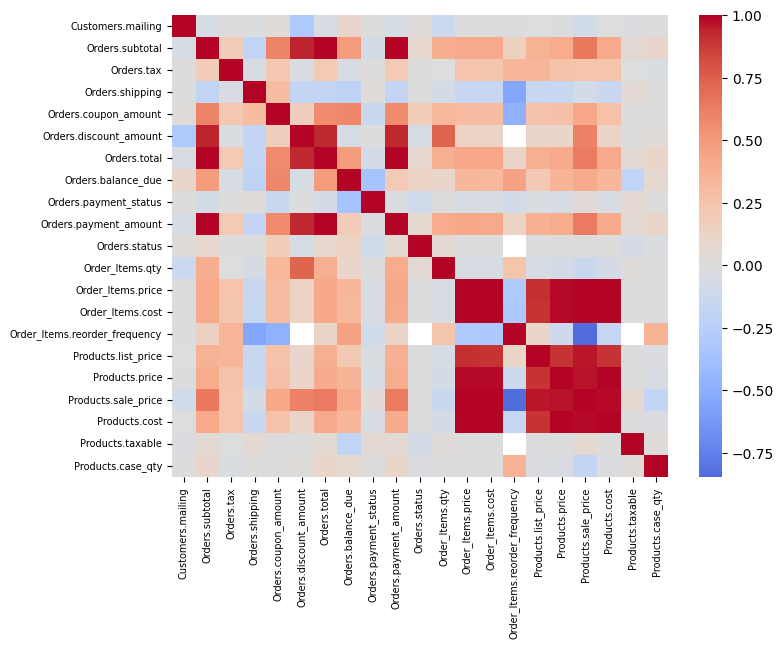

In [54]:
plt.figure(figsize=(8, 6), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.xticks(rotation=90, fontsize=7)
plt.yticks(rotation=0, fontsize=7)

plt.show()

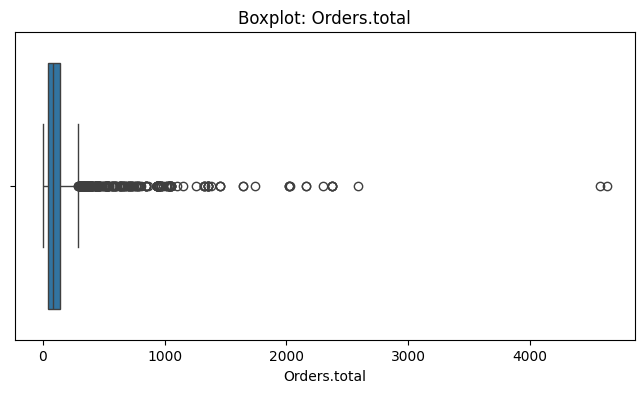

In [652]:
plt.figure(figsize=(8, 4))

sns.boxplot(data=df, x='Orders.total')

plt.title("Boxplot: Orders.total")
plt.show()


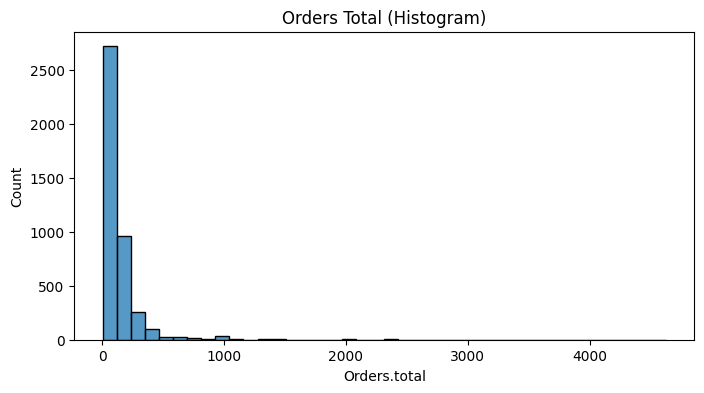

In [558]:
plt.figure(figsize=(8, 4))

sns.histplot(data=df, x='Orders.total', bins=40)

plt.title('Orders Total (Histogram)')
plt.show()

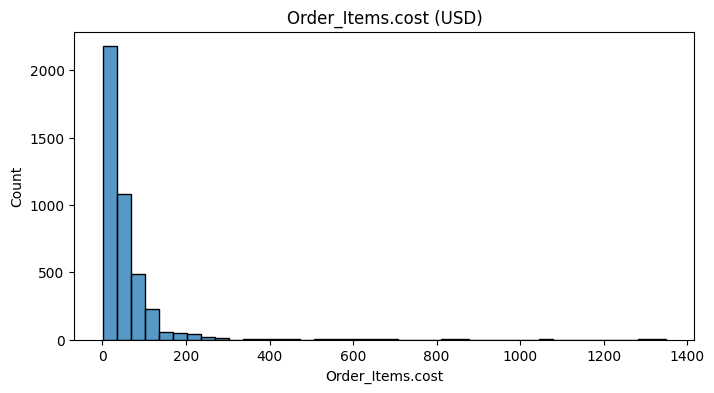

In [559]:
plt.figure(figsize=(8, 4))

sns.histplot(data=df, x='Order_Items.cost', bins=40)

plt.title("Order_Items.cost (USD)")

plt.show()

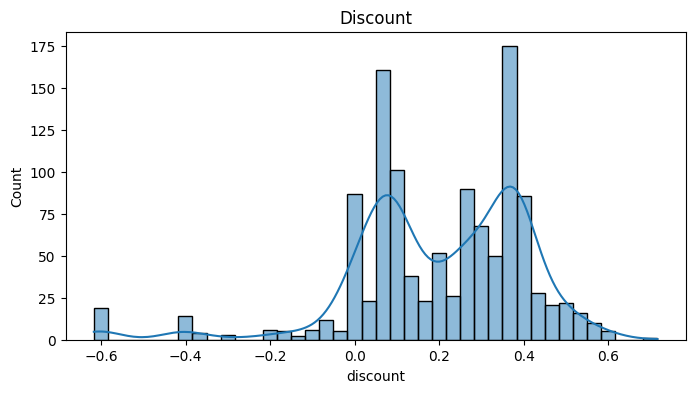

In [653]:
# % розподіл величини знижки
df['discount'] = (df['Products.price'] - df['Products.sale_price']) / df['Products.price']

plt.figure(figsize=(8,4))

sns.histplot(df, x='discount', bins=40, kde=True)
plt.title('Discount')
plt.show()

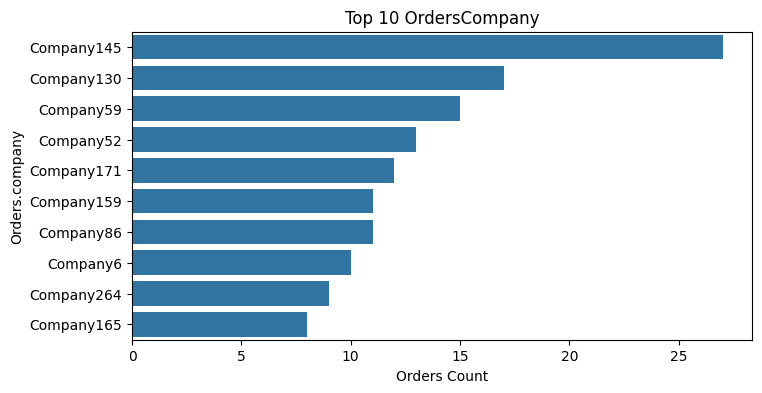

In [654]:
top_company = df['Orders.company'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_company.values, y=top_company.index)
plt.title("Top 10 OrdersCompany")
plt.xlabel("Orders Count")
plt.show()

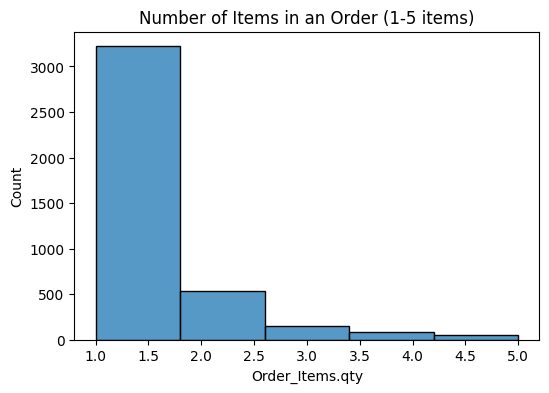

In [55]:
small_qty = df[df['Order_Items.qty'] <= 5]

plt.figure(figsize=(6, 4))

sns.histplot(data=small_qty, x='Order_Items.qty', bins=5)

plt.title('Number of Items in an Order (1-5 items)')

plt.show()

In [56]:
df_backup2 = df.copy() 

In [57]:
### =================================== SEPARATE DATAFRAMES ======================

df_customers = df.filter(like="Customers.")
df_orders = df.filter(like="Orders.")
df_items = df.filter(like="Order_Items.")    
df_products = df.filter(like="Products.")
 

In [58]:
df_customers.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customers.id             4194 non-null   object        
 1   Customers.fname          4194 non-null   object        
 2   Customers.lname          4194 non-null   object        
 3   Customers.company        4194 non-null   object        
 4   Customers.create_date    4194 non-null   datetime64[ns]
 5   Customers.mailing        2114 non-null   float64       
 6   Customers.last_modified  4194 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 229.5+ KB


In [64]:
df_customers.head(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified
0,797,Christy,Dill,Company0,2015-03-10 20:18:44,0.0,2015-07-24 18:58:26
1,3,John,Smith,Company1,2013-12-03 16:45:39,0.0,2015-07-24 18:59:14
2,3,John,Smith,Company1,2013-12-03 16:45:39,0.0,2015-07-24 18:59:14
3,4,James,Anderson,Individual,2013-12-11 16:44:23,0.0,2015-07-24 18:30:46
4,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36
5,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36
6,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0.0,2015-07-24 18:58:36
7,7,Peggy,Thompson,Individual,2013-12-27 14:52:27,0.0,2015-07-24 18:46:57
8,8,Randy,Pruss,Individual,2014-01-09 21:33:36,0.0,2015-07-24 18:43:41
9,10,Tommy,Smith,Individual,2014-01-23 20:38:36,0.0,2015-07-24 18:45:53


In [63]:
## ---  Fehlende Werte auffüllen   (in df_customers) --- 

#for row in range(len(df_customers)):
#    if pd.isna(df_customers.iloc[row, 5]):  
#        df_customers.iloc[row, 5] = 0
# oder
# --- 
df['Customers.mailing'] = df['Customers.mailing'].fillna(0)   
df_customers = df.filter(like="Customers.") # separate again after filling missing values


In [68]:
################ DUPLIKATES REMOVE ()

# --- ONLY  in df_customers: 
df_customers   = df_customers.drop_duplicates(
    subset=["Customers.id", "Customers.create_date"],
    keep="first"
)
len(df_customers)

### ----------------------------------------------------- df_customers finish!
df_backup3 = df.copy() 

In [69]:
# df_orders = df.filter(like="Orders.") # separate 
df_orders.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Orders.id                4194 non-null   object        
 1   Orders.customer_id       4194 non-null   object        
 2   Orders.company           730 non-null    object        
 3   Orders.order_number      4194 non-null   object        
 4   Orders.reorder_id        82 non-null     object        
 5   Orders.subtotal          4194 non-null   float64       
 6   Orders.tax               3737 non-null   float64       
 7   Orders.shipping          3999 non-null   float64       
 8   Orders.coupon_id         882 non-null    object        
 9   Orders.coupon_amount     882 non-null    float64       
 10  Orders.discount_name     282 non-null    object        
 11  Orders.discount_amount   364 non-null    float64       
 12  Orders.total             4194 non-

In [70]:
### ---  Fehlende Werte in bearbeiten (df_orders) --- 

# --- in df_orders: testing

#for row in range(len(df_orders)):
#    if pd.isna(df_orders.iloc[row, 4]):  
#        df_orders.iloc[row, 4] = 0

#df_orders.iloc[:, [5, 6, 7, 9, 11, 13]] = df_orders.iloc[:, [5, 6, 7, 9, 11, 13]].fillna(0)

cols_oders = ['Orders.subtotal', 'Orders.tax', 'Orders.shipping'] 

# 'Orders.balance_due' - später bearbeiten
# 'Orders.subtotal  ...oder eine gefüllte Kopie für die Visualisierung erstellen und das Original mit NaN beibehalten?
# df_orders['subtotal_filled'] = df_orders['Orders.subtotal'].fillna(0)

# --- in df: fixing

df[cols_oders] = df[cols_oders].fillna(0)

In [71]:
### --- update columns ---

# --- in df_orders: testing
#df_orders['Orders.discount_name'] = df_orders['Orders.discount_name'].fillna("No Discount")

# --- in df: fixing
df['Orders.discount_name'] = df['Orders.discount_name'].fillna("No Discount")


In [72]:
import numpy as np  # перенести на початок?
### --- update columns ---
### --- 'Orders.shipping_method'  ---  text update 

# --- in df_orders: testing
#df_orders['Orders.shipping_method'] = (
#    df_orders['Orders.shipping_method']
#    .str.split('|')
#    .str[-1]
#    .replace("nan", np.nan)
#)

# --- in df: fixing
df['Orders.shipping_method'] = (
    df['Orders.shipping_method']
    .str.split('|')
    .str[-1]
    .replace("nan", np.nan)
)

In [73]:
### --- update columns ---
### --- Orders.payment_method + Orders.payment_type - field union ---

# --- in df_orders: testing
#df_orders['Orders.payment_method'] = df_orders['Orders.payment_method'].fillna(df_orders['Orders.payment_type'])

# in df: fixing
df['Orders.payment_method'] = df['Orders.payment_method'].fillna(df['Orders.payment_type'])

In [74]:
df_orders = df.filter(like="Orders.")  # separate again after filling missing values
df_orders.head()

,Orders.id,Orders.customer_id,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date
0,3758,797,Company0,3758,NaN,57.20,0.0,9.95,13.0,2.86,No Discount,NaN,64.29,NaN,fedex,Ground,3.0,2015-03-10 20:24:59,authorize.net,authorize.net,64.29,1,2015-03-10 20:24:59,2015-08-06 13:40:10,2015-03-11 19:08:42
1,23,3,Company1,23,NaN,20.00,0.0,9.99,NaN,NaN,No Discount,NaN,29.99,NaN,fedex,Ground,3.0,2013-12-03 17:07:35,authorize.net,authorize.net,29.99,1,2013-12-03 17:07:35,2015-08-25 18:49:43,2013-12-03 20:30:21
2,9531,3,Company1,9531,NaN,68.78,0.0,9.95,NaN,NaN,No Discount,NaN,78.73,NaN,manual,Standard Shipping,3.0,2015-12-08 19:40:52,authorize.net,authorize.net,78.73,3,2015-12-08 19:40:52,2015-12-15 21:04:47,NaT
3,29,4,NaN,29,NaN,19.56,0.0,9.95,NaN,NaN,No Discount,NaN,29.55,NaN,NaN,Ground,3.0,2013-12-11 16:44:23,NaN,Credit Card,29.55,1,2013-12-11 16:44:23,2015-08-25 18:49:43,2013-12-11 22:15:32
4,30,5,Company3,30,NaN,36.05,0.0,9.95,NaN,NaN,No Discount,NaN,46.00,NaN,fedex,Ground,3.0,2013-12-12 15:19:59,NaN,Credit Card,46.00,1,2013-12-12 15:19:59,2015-08-25 18:49:43,2013-12-12 19:13:43


In [75]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Orders.id                4194 non-null   object        
 1   Orders.customer_id       4194 non-null   object        
 2   Orders.company           730 non-null    object        
 3   Orders.order_number      4194 non-null   object        
 4   Orders.reorder_id        82 non-null     object        
 5   Orders.subtotal          4194 non-null   float64       
 6   Orders.tax               4194 non-null   float64       
 7   Orders.shipping          4194 non-null   float64       
 8   Orders.coupon_id         882 non-null    object        
 9   Orders.coupon_amount     882 non-null    float64       
 10  Orders.discount_name     4194 non-null   object        
 11  Orders.discount_amount   364 non-null    float64       
 12  Orders.total             4194 non-

In [76]:
# --- in df_orders: testing
df_orders['Orders.id'].nunique()
#df_orders[df_orders['Orders.payment_amount'].isna()]

3565

In [77]:
df_orders['Orders.id'].value_counts()

Orders.id
16186    10
12450     9
7357      8
15667     8
941       6
         ..
171       1
1062      1
181       1
185       1
15625     1
Name: count, Length: 3565, dtype: int64

In [78]:
### --- Duplikate checking 
# --- in df_orders: testing
df_orders[df_orders['Orders.id'] == 7357]

,Orders.id,Orders.customer_id,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date
2058,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2059,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2060,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2061,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2062,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2063,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2064,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20
2065,7357,1730,Company159,7357,NaN,938.18,0.0,0.0,NaN,NaN,No Discount,NaN,938.18,NaN,manual,Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,authorize.net,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20


In [80]:
################ DUPLIKATES REMOVE ()

df_orders = df.filter(like="Orders.")  # separate again after filling missing values

# --- ONLY  in df_orders: 
df_orders   = df_orders.drop_duplicates(
    subset=["Orders.id", "Orders.placed_date"],
    keep="first"          
)
len(df_orders)
### ----------------------------------------------------- df_orders finish!
df_backup3 = df.copy() 

In [81]:
df_items = df.filter(like="Order_Items.")     # separate 

In [82]:
df_items.info()
df_items.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order_Items.id                 4194 non-null   object 
 1   Order_Items.parent             4194 non-null   object 
 2   Order_Items.product_id         4151 non-null   object 
 3   Order_Items.product_name       4194 non-null   object 
 4   Order_Items.qty                4194 non-null   int64  
 5   Order_Items.price              4194 non-null   float64
 6   Order_Items.cost               4191 non-null   float64
 7   Order_Items.reorder_frequency  24 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 262.3+ KB


,count,mean,std,min,25%,50%,75%,max
Order_Items.qty,4194.0,1.858846,8.821959,1.00,1.00,1.00,1.00,500.0
Order_Items.price,4194.0,67.349132,95.571793,1.12,24.03,43.46,74.99,1899.0
Order_Items.cost,4191.0,51.112718,74.155515,0.28,16.20,32.50,59.50,1350.0
Order_Items.reorder_frequency,24.0,1.666667,0.916831,1.00,1.00,1.00,2.00,4.0


In [83]:
df_items.head(8)

,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency
0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,NaN
1,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,NaN
2,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,NaN
3,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,NaN
4,40,30,991.0,Tens Units,1,36.05,25.75,NaN
5,341,226,310.0,"FitRight Ultra Protective Underwear, Large",1,44.46,32.22,2.0
6,2997,1658,799.0,"SensiCare Silk Nitrile Exam Gloves, Dark Blue,...",1,14.63,8.36,3.0
7,1797,32,1379.0,Aloetouch Sensitive Personal Cleansing Baby Wipes,1,39.19,27.99,NaN


In [84]:
null_value = df_items[df_items['Order_Items.cost'].isna()] # nur 3 NaN
null_value

,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency
2373,19368,16674,148.0,CURAD Powder-Free Latex-Free 3G Vinyl Exam Glo...,2,47.82,NaN,NaN
4023,19772,16750,16476.0,"Inflatable Exercise Ball - Accessory - 6"" Hand...",1,8.25,NaN,NaN
4050,19674,16962,NaN,"BUCKET, REPLACEMENT FOR MDS89668XW",1,44.00,NaN,NaN


In [85]:
df_items['cost_price_ratio'] = df_items['Order_Items.cost'] / df_items['Order_Items.price']
df_items['cost_price_ratio'].describe()

C:\Users\Anna\AppData\Local\Temp\ipykernel_8420\437051391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['cost_price_ratio'] = df_items['Order_Items.cost'] / df_items['Order_Items.price']


count    4191.000000
mean        0.695382
std         0.158454
min         0.090045
25%         0.656710
50%         0.724607
75%         0.769231
max         1.803172
Name: cost_price_ratio, dtype: float64

In [86]:
median_ratio = round(df_items['cost_price_ratio'].median(),2)
#median_ratio = df_items['cost_price_ratio'].median()

median_ratio

np.float64(0.72)

In [96]:
#in df_items: testing
df_items['Order_Items.cost'] = df_items['Order_Items.cost'].fillna(df_items['Order_Items.price'] * median_ratio)

C:\Users\Anna\AppData\Local\Temp\ipykernel_8420\446948470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['Order_Items.cost'] = df_items['Order_Items.cost'].fillna(df_items['Order_Items.price'] * median_ratio)


In [97]:
# in df: fixing
df['Order_Items.cost'] = df['Order_Items.cost'].fillna(df['Order_Items.price'] * median_ratio)
df_items = df.filter(like="Order_Items.")     # separate again after filling missing values

In [100]:

#pd.set_option('display.max_columns', None)

df_items.iloc[2372:2374]
df_items.iloc[4022:4024]
df_items.iloc[4049:4051]
#df[df['Order_Items.id'] == 19368] # bearbeten
#df[df['Order_Items.product_id'] == 16476] 
#df[df['Order_Items.id'] == 19674]  # viel NaN -- delete?

,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,cost_price_ratio
4049,19671,16961,2168.0,Caring Woven Sterile Gauze Sponges,1,15.84,2.88,NaN,0.181818
4050,19674,16962,NaN,"BUCKET, REPLACEMENT FOR MDS89668XW",1,44.00,31.68,NaN,0.720000


In [101]:
#df_items.loc[df_items['Order_Items.product_id'] == '16476', 'Order_Items.cost'] = 1.5
#df.loc[df['Order_Items.product_id'] == '16476', 'Order_Items.cost'] = 1.5

df_items[df_items['Order_Items.product_id'] == 16476] # bearbeten

,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,cost_price_ratio
2598,13799,11540,16476.0,"Inflatable Exercise Ball - Accessory - 6"" Hand...",1,8.25,1.50,NaN,0.181818
4023,19772,16750,16476.0,"Inflatable Exercise Ball - Accessory - 6"" Hand...",1,8.25,5.94,NaN,0.720000


In [103]:
df_items.nunique()   #.sort_values()


Order_Items.id                   4194
Order_Items.parent               3565
Order_Items.product_id           1753
Order_Items.product_name         1821
Order_Items.qty                    23
Order_Items.price                1508
Order_Items.cost                 1338
Order_Items.reorder_frequency       4
cost_price_ratio                 1254
dtype: int64

In [104]:
#--- no duplicates

### ----------------------------------------------------- df_items finish!
df_backup3 = df.copy() 

In [120]:
### ---- Process product table - start! 
df_products = df.filter(like="Products.")

In [125]:
df_products.head(8)

,Products.id,Products.status,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_color,Products.unit,Products.packaging,Products.case_qty,Products.family_id
0,2310.0,0.0,Vendor_A,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,NaN,44.00,2016-05-13 18:05:23,1.0,MEDLINE,Green,EA,1 Each / Each,1.0,PF61071
1,177.0,1.0,Vendor_A,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.0,1.87,2016-05-04 13:52:35,1.0,MEDLINE,NaN,EA,1 Each / Each,1.0,PF02132
2,1.0,0.0,Vendor_A,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,NaN,52.50,2016-05-13 18:05:23,1.0,MEDLINE,Blue,CS,800 Each / Case,800.0,PF00342
3,983.0,0.0,Vendor_A,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,NaN,12.62,2016-05-07 04:31:15,1.0,MEDLINE,NaN,EA,1 Each / Each,1.0,PF04970
4,991.0,1.0,Vendor_A,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,NaN,25.75,2016-05-04 13:52:35,1.0,ROSCOE MEDICAL INC,NaN,EA,1 Each / Each,1.0,PF03045
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1379.0,0.0,Vendor_A,3.0,Aloetouch Sensitive Personal Cleansing Baby Wipes,Aloetouch Sensitive Personal Cleansing Baby Wipes,54.87,39.19,NaN,27.99,2016-05-04 13:52:35,1.0,MEDLINE,NaN,CS,1920 Each / Case,1920.0,PF01527


In [126]:
df_products.nunique()

Products.id                1710
Products.status               5
Products.vendor               8
Products.import_id           10
Products.name              1391
Products.display_name      1220
Products.list_price        1260
Products.price             1234
Products.sale_price         111
Products.cost              1225
Products.last_modified       54
Products.taxable              2
Products.shopping_brand     101
Products.shopping_color      98
Products.unit                20
Products.packaging          195
Products.case_qty            76
Products.family_id         1002
dtype: int64

In [127]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Products.id              4037 non-null   object        
 1   Products.status          4037 non-null   object        
 2   Products.vendor          4037 non-null   object        
 3   Products.import_id       4037 non-null   object        
 4   Products.name            4037 non-null   object        
 5   Products.display_name    3662 non-null   object        
 6   Products.list_price      4017 non-null   float64       
 7   Products.price           4036 non-null   float64       
 8   Products.sale_price      1160 non-null   float64       
 9   Products.cost            4037 non-null   float64       
 10  Products.last_modified   4037 non-null   datetime64[ns]
 11  Products.taxable         2959 non-null   float64       
 12  Products.shopping_brand  4032 non-

In [128]:
# --- delete rows with MISSING Products.id

df_products = df_products[df_products['Products.id'].notna()]

In [129]:
df_products[df_products.duplicated(subset=['Products.id', 'Products.name'], keep=False)].sort_values(by=['Products.id'])

,Products.id,Products.status,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_color,Products.unit,Products.packaging,Products.case_qty,Products.family_id
774,19.0,0.0,Vendor_A,3.0,Disposable Forehead Thermometer,Disposable Forehead Thermometer,63.76,45.54,NaN,33.00,2016-05-04 13:52:35,1.0,LIQUID CRYSTAL RESOURCES,NaN,BX,100 Each / Box,100.0,PF04398
1137,19.0,0.0,Vendor_A,3.0,Disposable Forehead Thermometer,Disposable Forehead Thermometer,63.76,45.54,NaN,33.00,2016-05-04 13:52:35,1.0,LIQUID CRYSTAL RESOURCES,NaN,BX,100 Each / Box,100.0,PF04398
3179,20.0,0.0,Vendor_A,3.0,"BariBrief Bariatric Briefs,65""-90""","BariBrief Bariatric Briefs, 65""-90""",140.14,100.10,NaN,77.00,2016-05-13 18:05:23,1.0,MEDLINE,NaN,CS,32 Each / Case,32.0,PF01399
1421,20.0,0.0,Vendor_A,3.0,"BariBrief Bariatric Briefs,65""-90""","BariBrief Bariatric Briefs, 65""-90""",140.14,100.10,NaN,77.00,2016-05-13 18:05:23,1.0,MEDLINE,NaN,CS,32 Each / Case,32.0,PF01399
411,30.0,0.0,Vendor_A,3.0,"Biomask Antiviral Face Masks,Blue","Biomask Antiviral Face Masks, Blue",53.61,38.29,NaN,27.35,2016-05-04 13:52:35,1.0,MEDLINE,Blue,BX,50 Each / Box,50.0,PF07346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,24416.0,1.0,Vendor_A,3.0,"3 Pack, Hospital Receiving Blankets, Baby Blan...",NaN,NaN,12.99,NaN,6.30,2016-01-27 20:01:04,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3789,24422.0,3.0,Vendor_I,19.0,"Fresh Sack 50's Degradable, Scented Disposable...",NaN,15.99,8.04,NaN,2.01,2016-01-27 22:16:47,0.0,FrashSacks&reg;,NaN,NaN,1 Box of 50,NaN,FSBAG
4129,24422.0,3.0,Vendor_I,19.0,"Fresh Sack 50's Degradable, Scented Disposable...",NaN,15.99,8.04,NaN,2.01,2016-01-27 22:16:47,0.0,FrashSacks&reg;,NaN,NaN,1 Box of 50,NaN,FSBAG
3820,25003.0,0.0,Vendor_K,21.0,"Dynarex 1348, Disposable Underpads, 30x36 (90 ...",NaN,NaN,35.42,NaN,25.30,2016-04-21 20:06:20,NaN,Dynarex,NaN,NaN,NaN,NaN,DY-18


In [ ]:
################ DUPLIKATES REMOVE ()

# after filling missing values


# --- ONLY  in df_products: 
df_products   = df_products.drop_duplicates(
    subset=["Products.id", "Products.last_modified"],
    keep="first"          
)


### ----------------------------------------------------- df_products finish!
df_backup3 = df.copy() 

In [163]:
df.nunique()[ (df.nunique() > 1) & (df.nunique() < 20) ]

Customers.mailing                 2
Orders.shipping_carrier          11
Orders.shipping_method           13
Orders.payment_status             3
Orders.payment_method             5
Orders.status                    10
Order_Items.reorder_frequency     4
Products.status                   5
Products.vendor                   8
Products.import_id               10
Products.taxable                  2
dtype: int64

In [ ]:
category_list

['Orders.shipping_carrier',
 'Orders.shipping_method ',
 'Orders.payment_method',
 'Products.vendor',
 'Products.shopping_brand']

In [166]:
# delete columns with special characters

df = df.drop(columns=blacklist3, errors='ignore')

In [167]:
# !!!!! only after handling missing values in the separate dataframes

for col in category_list:
    df[col] = df[col].astype("category")   

In [169]:
df_customers = df.filter(like="Customers.")
df_orders = df.filter(like="Orders.")
df_items = df.filter(like="Order_Items.")    
df_products = df.filter(like="Products.")

################ DUPLIKATES REMOVE ()
# df_customers: 
df_customers   = df_customers.drop_duplicates(
    subset=["Customers.id", "Customers.create_date"],
    keep="first"
)

# df_orders: 
df_orders   = df_orders.drop_duplicates(
    subset=["Orders.id", "Orders.placed_date"],
    keep="first"          
)
# df_items:
df_items['cost_price_ratio'] = df_items['Order_Items.cost'] / df_items['Order_Items.price']


# df_products: 
df_products = df_products[df_products['Products.id'].notna()]

df_products   = df_products.drop_duplicates(
    subset=["Products.id", "Products.last_modified"],
    keep="first"          
)



C:\Users\Anna\AppData\Local\Temp\ipykernel_8420\2322882178.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['cost_price_ratio'] = df_items['Order_Items.cost'] / df_items['Order_Items.price']


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customers.id                   4194 non-null   object        
 1   Customers.fname                4194 non-null   object        
 2   Customers.lname                4194 non-null   object        
 3   Customers.company              4194 non-null   object        
 4   Customers.create_date          4194 non-null   datetime64[ns]
 5   Customers.mailing              4194 non-null   float64       
 6   Customers.last_modified        4194 non-null   datetime64[ns]
 7   Orders.id                      4194 non-null   object        
 8   Orders.customer_id             4194 non-null   object        
 9   Orders.company                 730 non-null    object        
 10  Orders.order_number            4194 non-null   object        
 11  Orders.reorder_id

In [ ]:
#for col in integer_list:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.replace(r'\.0$', '', regex=True)
        .replace({'': None, 'nan': None, 'NaN': None})
        .astype('Int64')               
    )

In [ ]:
df['Orders.coupon_id'] = (
    df['Orders.coupon_id']
    .astype(str)
    .str.strip()
    .str.replace(r'\.0$', '', regex=True)
    .replace({'nan': None, 'None': None, '': None})
    .astype('string')
)

In [ ]:
#df_products['discount'] = (df_products['Products.price'] - df_products['Products.sale_price']) / df_products['Products.price']

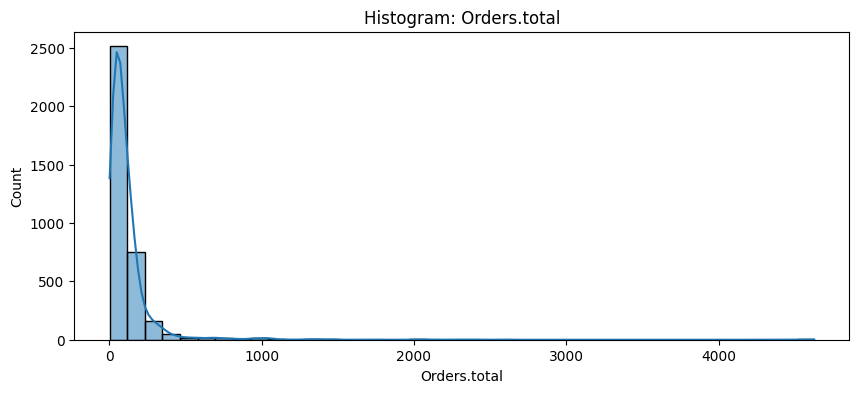

In [170]:
plt.figure(figsize=(10,4))
sns.histplot(df_orders['Orders.total'], bins=40, kde=True)
plt.title("Histogram: Orders.total")
plt.xlabel("Orders.total")
plt.ylabel("Count")
plt.show()

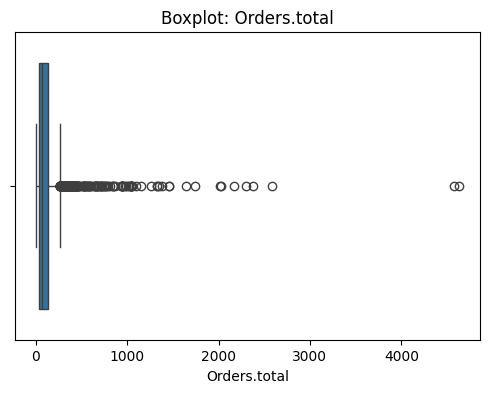

In [171]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_orders['Orders.total'])
plt.title("Boxplot: Orders.total")
plt.xlabel("Orders.total")
plt.show()

In [ ]:
### --- outliers investigation ---
#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]

,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
522,2144,442,4627.95,4627.95
3469,14924,3006,4575.00,4575.00
3686,15657,3234,2588.00,2588.00
2401,10729,2022,2375.59,2375.59
141,572,143,2300.00,2300.00
3630,15457,3174,2164.30,2164.30
2280,9742,1918,2031.93,2031.93
2967,12835,2539,2017.92,NaN
2970,12836,2540,1740.00,580.00
226,965,218,1647.06,1548.06
